In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xlsx_file_path = 'Online Retail.xlsx'
csv_file_path = 'online_retail.csv'
df = pd.read_excel(xlsx_file_path)
df.to_csv(csv_file_path, index=False)

print(f'Conversion complete. CSV file saved at: {csv_file_path}')

Conversion complete. CSV file saved at: online_retail.csv


In [3]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      2006
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     174768
Country             0
dtype: int64


In [5]:
df.dropna(subset=['Description', 'CustomerID'], inplace=True)

In [6]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
total_rows = df.shape[0]
print(f'Total number of rows: {total_rows}')

Total number of rows: 534805


In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534805 entries, 0 to 709572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534805 non-null  object        
 1   StockCode    534805 non-null  object        
 2   Description  534805 non-null  object        
 3   Quantity     534805 non-null  int64         
 4   InvoiceDate  534805 non-null  datetime64[ns]
 5   UnitPrice    534805 non-null  float64       
 6   CustomerID   534805 non-null  float64       
 7   Country      534805 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


In [9]:
duplicate_rows_description = df[df.duplicated(subset=['StockCode', 'InvoiceDate', 'Quantity'])]
# Display or print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows_description)

Duplicate Rows:
       InvoiceNo StockCode                         Description  Quantity  \
517       536409     21866         UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866       HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900     SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111        SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327   ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                 ...       ...   
709568    580516     23504    PLAYING CARDS JUBILEE UNION JACK         1   
709569    580516     23503  PLAYING CARDS KEEP CALM & CARRY ON         2   
709570    580516     21889              WOODEN BOX OF DOMINOES         3   
709571    580516     21012       ANTIQUE ALL GLASS CANDLESTICK         4   
709572    580516     21912            VINTAGE SNAKES & LADDERS         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
517

In [10]:
df.drop_duplicates(subset=['StockCode', 'InvoiceDate', 'Quantity'], inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
657341,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
657342,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
657343,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
657344,536364,22415,WHITE TISSUE REAM,10,2010-11-30 19:35:00,7.95,14441.0,United Kingdom


In [11]:
string_stockcode_rows = df[df['StockCode'].notna() & df['StockCode'].str.isalpha()]
pd.set_option('display.max_rows', None)
print("Rows with 'StockCode' as a string:")
print(string_stockcode_rows)



Rows with 'StockCode' as a string:
       InvoiceNo StockCode                 Description  Quantity  \
45        536370      POST                     POSTAGE         3   
141      C536379         D                    Discount        -1   
386       536403      POST                     POSTAGE         1   
1123      536527      POST                     POSTAGE         1   
2239      536569         M                      Manual         1   
5073      536840      POST                     POSTAGE         1   
5258      536852      POST                     POSTAGE         1   
5325      536858      POST                     POSTAGE         2   
5369      536861      POST                     POSTAGE         3   
6602      536967      POST                     POSTAGE         1   
6676      536974      POST                     POSTAGE         2   
6798      536981         M                      Manual         2   
6973      536983      POST                     POSTAGE         1   
7139      536

In [12]:
df = df[~(df['StockCode'].notna() & df['StockCode'].str.isalpha())]
# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)
# Displaying the DataFrame after dropping rows
print("DataFrame after dropping rows with 'StockCode' as a string:")
df.shape[0]

DataFrame after dropping rows with 'StockCode' as a string:


490291

In [13]:
# Display rows with missing descriptions
missing_desc_rows = df[df['Description'].isnull()]
print(missing_desc_rows)
contains_question_mark = df['Description'].str.contains(r'\?')
# Display rows where 'Description' contains '?'
rows_with_question_mark = df[contains_question_mark]
print(rows_with_question_mark)


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [14]:
#Incorrect Prices
StockList = df.StockCode.unique()
CalculatedMode = map(lambda x: df.UnitPrice[df.StockCode == x].mode()[0],StockList)
StockModes = list(CalculatedMode)
for i,v in enumerate(StockList):
    df.loc[df['StockCode']== v, 'UnitPrice'] = StockModes[i]

In [15]:
zero_price_rows = df[df['UnitPrice'] == 0]
print(zero_price_rows)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [16]:
df.to_csv('cleaned_data.csv', index=False)

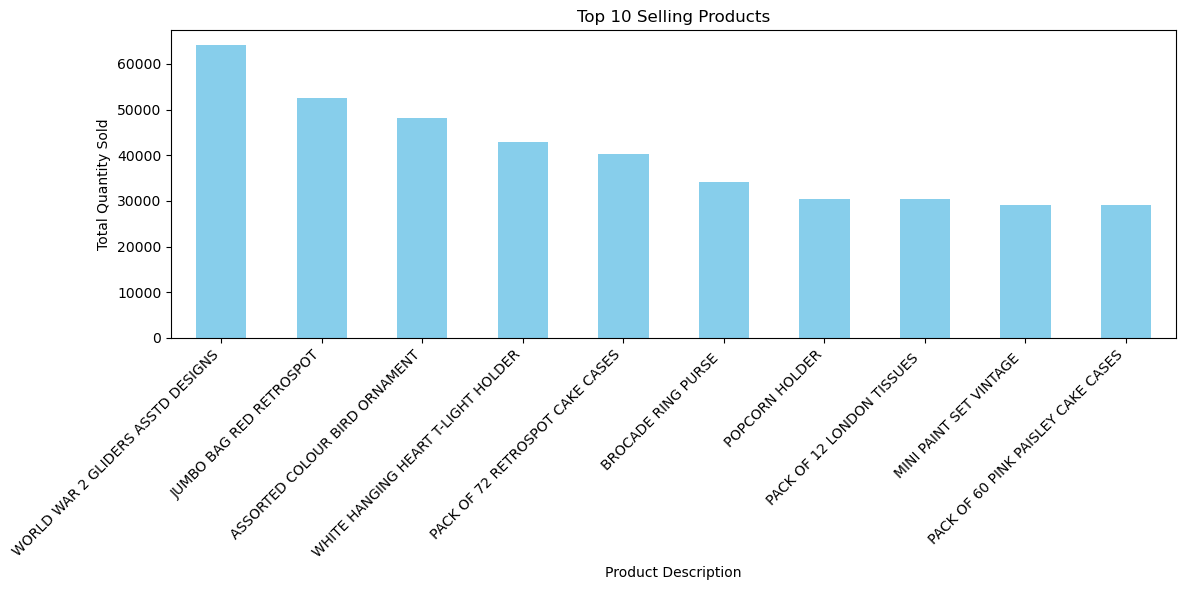

In [17]:
df_clean = pd.read_csv('cleaned_data.csv')

# Grouping by 'Description' and sum the 'Quantity' for each product
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Setting the number of top products you want to visualize
top_n = 10
top_products = top_products.head(top_n)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top {} Selling Products'.format(top_n))
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


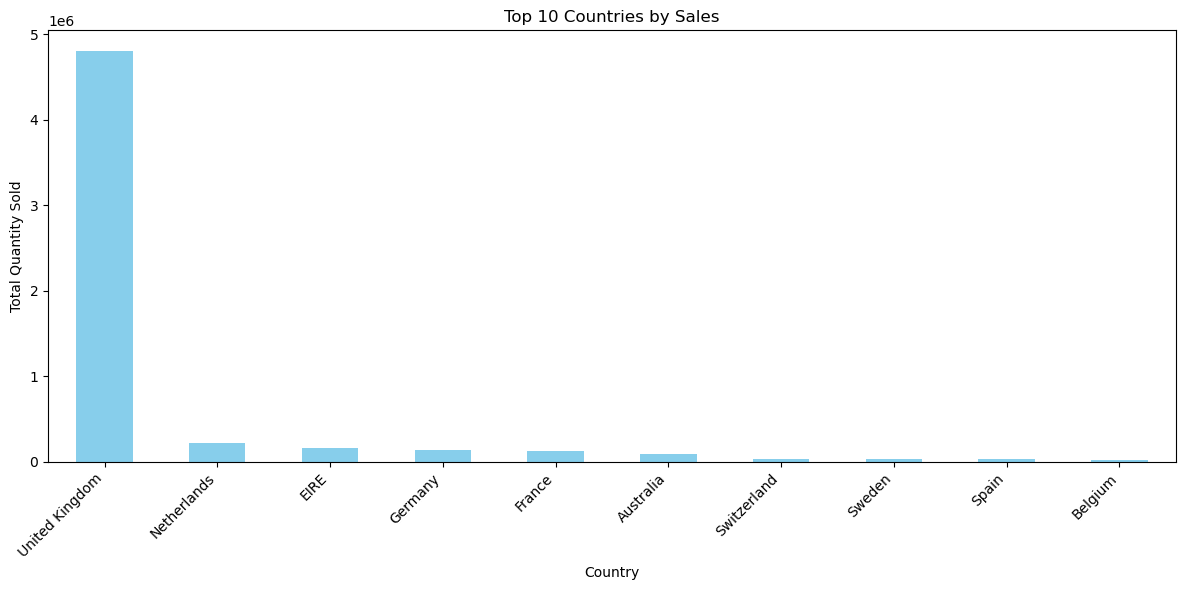

In [18]:
# Group by 'Country' and sum the 'Quantity' for each country
sales_by_country = df_clean.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Setting the number of top countries you want to visualize
top_n_countries = 10
top_countries = sales_by_country.head(top_n_countries)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top {} Countries by Sales'.format(top_n_countries))
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


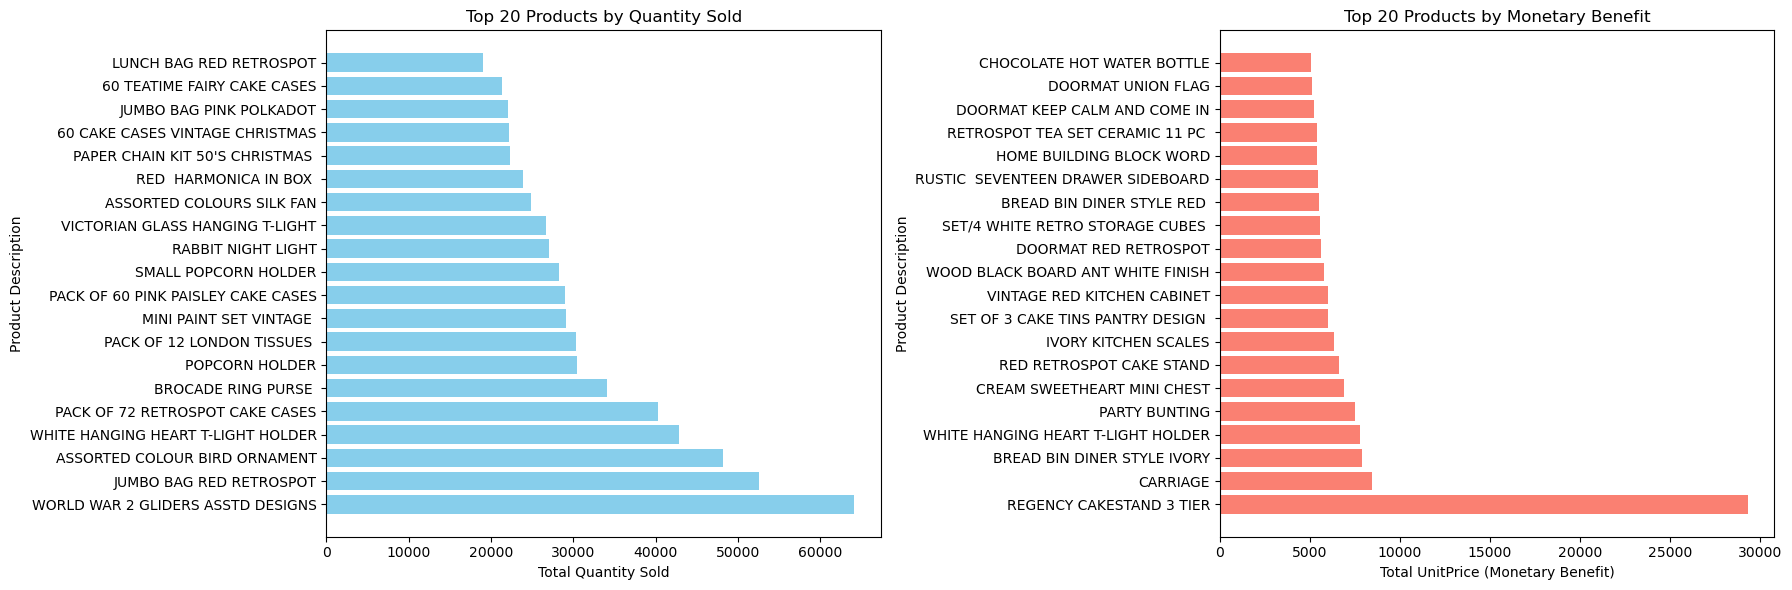

In [19]:
# Calculating the total quantity and total monetary benefit for each product
product_stats = df_clean.groupby('Description').agg({'Quantity': 'sum', 'UnitPrice': 'sum'})

# Sorting products based on quantity and monetary benefit
top_quantity_products = product_stats.sort_values(by='Quantity', ascending=False).head(20)
top_revenue_products = product_stats.sort_values(by='UnitPrice', ascending=False).head(20)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].barh(top_quantity_products.index, top_quantity_products['Quantity'], color='skyblue')
axes[0].set_title('Top 20 Products by Quantity Sold')
axes[0].set_xlabel('Total Quantity Sold')
axes[0].set_ylabel('Product Description')

axes[1].barh(top_revenue_products.index, top_revenue_products['UnitPrice'], color='salmon')
axes[1].set_title('Top 20 Products by Monetary Benefit')
axes[1].set_xlabel('Total UnitPrice (Monetary Benefit)')
axes[1].set_ylabel('Product Description')
plt.tight_layout()
plt.show()


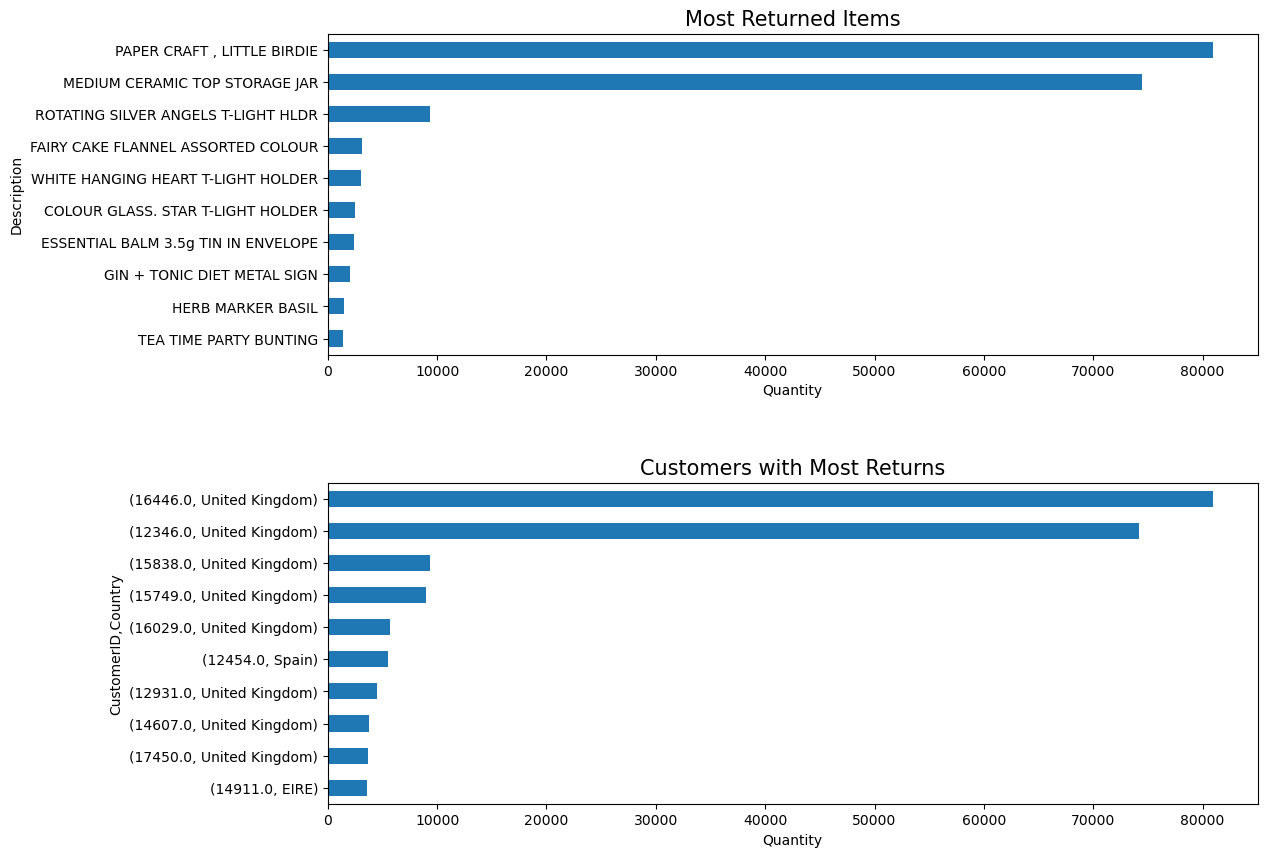

In [20]:
# Finding the most returned items
returned_items = (
    df_clean[df_clean['Quantity'] < 0]
    .groupby('Description')['Quantity']
    .sum()
    .abs()
    .sort_values(ascending=False)
    .head(10)
)
# Finding customers with the most returns
return_customers = (
    df_clean[df_clean['Quantity'] < 0]
    .groupby(['CustomerID', 'Country'])['Quantity']
    .sum()
    .abs()
    .sort_values(ascending=False)
    .head(10)
)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
returned_items.sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('Most Returned Items', fontsize=15)
ax1.set(xlabel='Quantity')
return_customers.sort_values().plot(kind='barh', ax=ax2)
ax2.set_title('Customers with Most Returns', fontsize=15)
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()


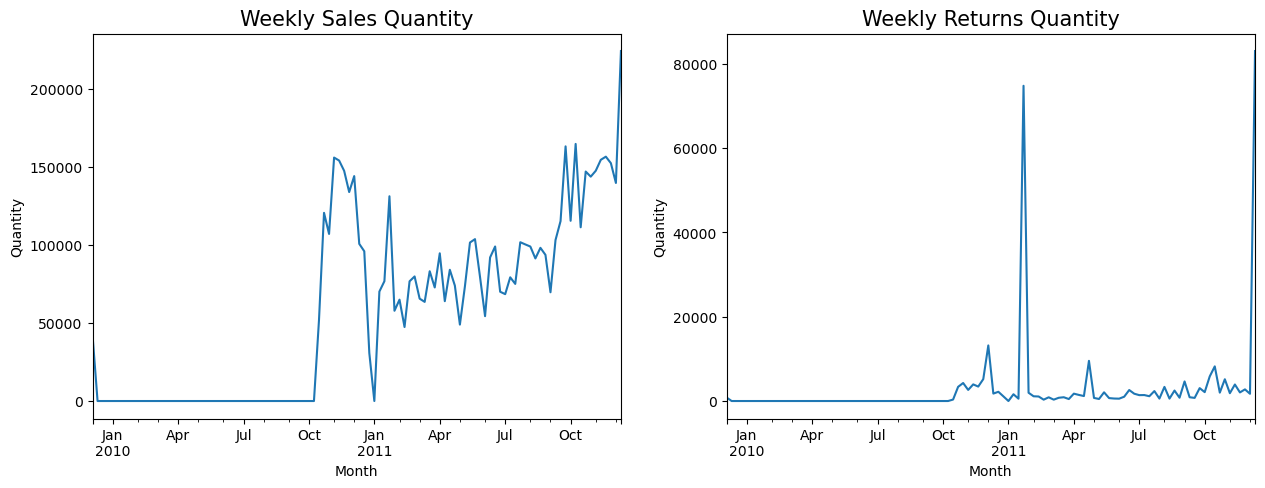

In [21]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean.set_index('InvoiceDate', inplace=True)
WeeklySale = df_clean[df_clean['Quantity'] > 0].Quantity.resample('W').sum()
WeeklyRet = df_clean[df_clean['Quantity'] < 0].Quantity.resample('W').sum().abs()
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
#Plotting weekly sales
WeeklySale.plot(ax=ax1).set(xlabel="Month", ylabel="Quantity")
ax1.set_title("Weekly Sales Quantity", fontsize=15)
WeeklyRet.plot(ax=ax2).set(xlabel="Month", ylabel="Quantity")
ax2.set_title("Weekly Returns Quantity", fontsize=15)
plt.show()


Percentage of Repeat Customers: 71.34%


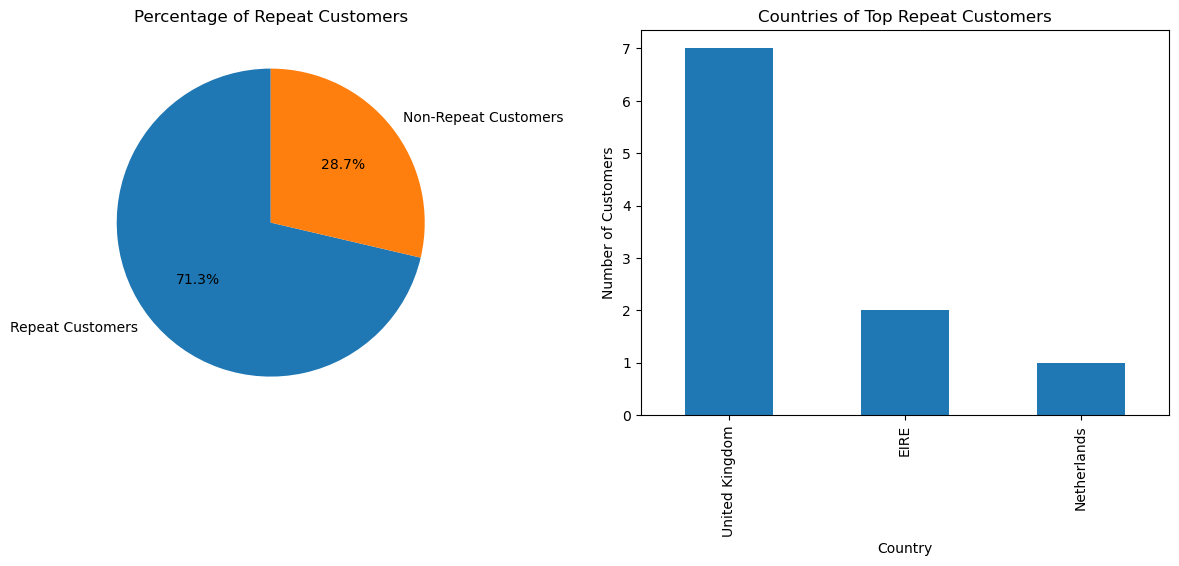

In [22]:
# Counting the number of transactions for each customer
customer_transaction_counts = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()

# Identifying repeat customers (those with more than one transaction)
repeat_customers = customer_transaction_counts[customer_transaction_counts > 1]

# Calculating the percentage of repeat customers
repeat_percentage = (len(repeat_customers) / len(customer_transaction_counts)) * 100

print(f"Percentage of Repeat Customers: {repeat_percentage:.2f}%")

# Identifying customers with the most repeats and their countries
top_repeat_customers = repeat_customers.sort_values(ascending=False).head(10)
top_repeat_customers_info = df_clean[df_clean['CustomerID'].isin(top_repeat_customers.index)][['CustomerID', 'Country']].drop_duplicates()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting a pie chart for the percentage of repeat customers
ax1.pie([len(repeat_customers), len(customer_transaction_counts) - len(repeat_customers)],
        labels=['Repeat Customers', 'Non-Repeat Customers'],
        autopct='%1.1f%%',
        startangle=90)
ax1.set(title="Percentage of Repeat Customers")

# Creating a bar chart for the countries of the top repeat customers
top_repeat_customers_info['Country'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_xlabel("Country")
ax2.set_ylabel("Number of Customers")
ax2.set_title("Countries of Top Repeat Customers")

plt.show()


In [23]:
unique_countries = df_clean['Country'].nunique()
print(f"The dataset contains data from {unique_countries} unique countries.")

The dataset contains data from 38 unique countries.


**Visualization of geographic sales distribution using geopandas and matplotlib**

**Note: This was created out of personal curiosity and is not part of project.**


C:\Users\Dell\AppData\Local\Temp\ipykernel_2904\143342918.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


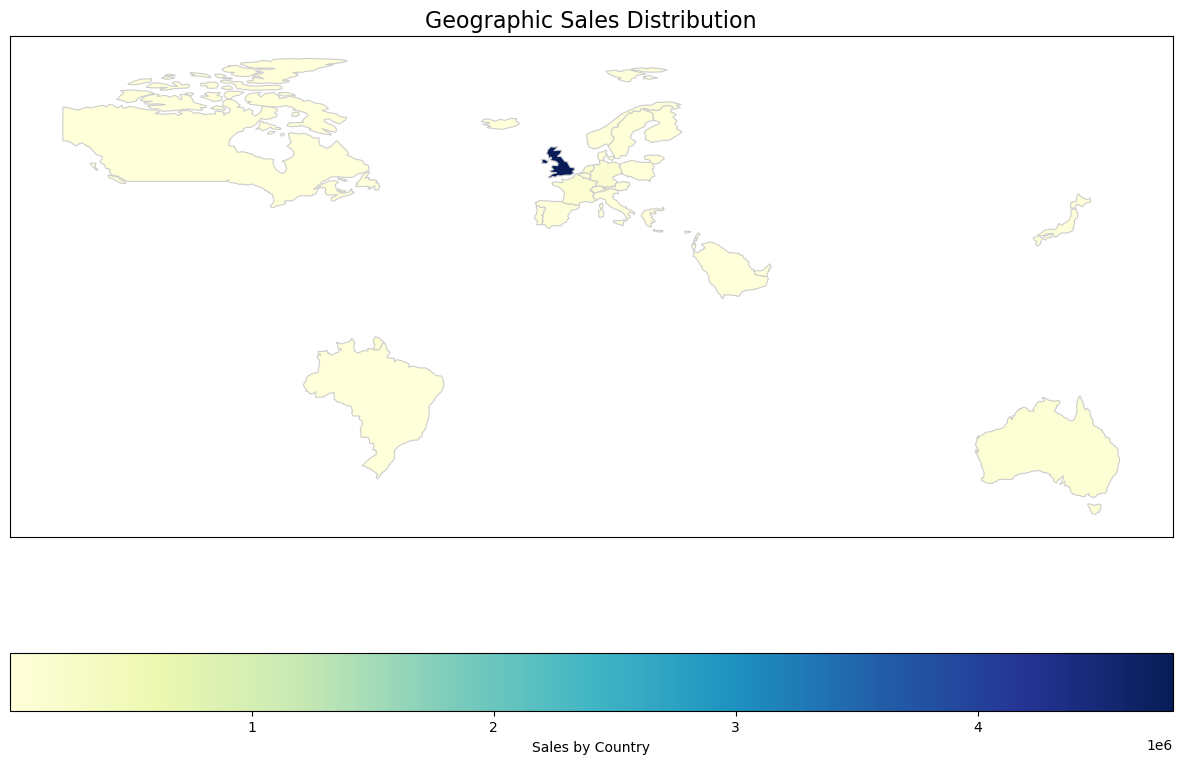

In [24]:
import geopandas as gpd


# Load Natural Earth countries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
sales_by_country = df_clean.groupby('Country')['Quantity'].sum().reset_index()
merged_data = world.merge(sales_by_country, how='left', left_on='name', right_on='Country')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Quantity', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Sales by Country",
                                                                                                              'orientation': "horizontal"})
plt.title('Geographic Sales Distribution', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
